In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
whole_data = pd.read_csv(r'Data\Book1.csv')
whole_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
994,995,B006F2NYI2,A1T5CH6SHV989P,a biemold,2,2,5,1323734400,best hot sauce around,absolutely love the habenaro sauce...use it on...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...


In [4]:
data=whole_data[['Score','Text']]
data

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
994,5,absolutely love the habenaro sauce...use it on...
995,5,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,5,"Man what can i say, this salsa is the bomb!! i..."
997,5,this sauce is so good with just about anything...


In [5]:
data.isnull().sum()

Score    0
Text     0
dtype: int64

<Axes: xlabel='Score'>

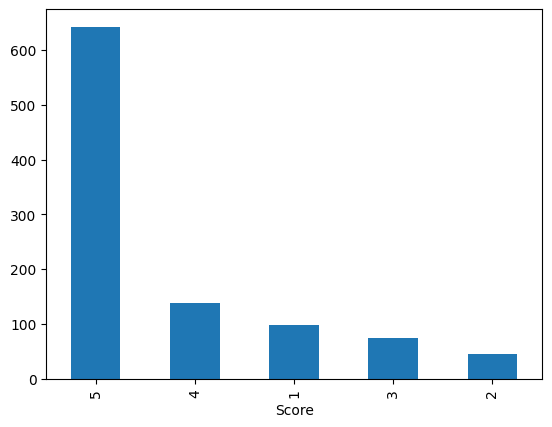

In [6]:
data['Score'].value_counts().plot.bar()

In [7]:
#Finding the character count
data['Char_count']= data['Text'].apply(len)
data

,Score,Text,Char_count
0,5,I have bought several of the Vitality canned d...,263
1,1,Product arrived labeled as Jumbo Salted Peanut...,190
2,4,This is a confection that has been around a fe...,509
3,2,If you are looking for the secret ingredient i...,219
4,5,Great taffy at a great price. There was a wid...,140
...,...,...,...
994,5,absolutely love the habenaro sauce...use it on...,256
995,5,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,477
996,5,"Man what can i say, this salsa is the bomb!! i...",305
997,5,this sauce is so good with just about anything...,265


In [8]:
#Finding the word count
data['Word_Count']=data['Text'].apply(lambda x: len(str(x).split()))
data

,Score,Text,Char_count,Word_Count
0,5,I have bought several of the Vitality canned d...,263,48
1,1,Product arrived labeled as Jumbo Salted Peanut...,190,31
2,4,This is a confection that has been around a fe...,509,94
3,2,If you are looking for the secret ingredient i...,219,41
4,5,Great taffy at a great price. There was a wid...,140,27
...,...,...,...,...
994,5,absolutely love the habenaro sauce...use it on...,256,40
995,5,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,477,94
996,5,"Man what can i say, this salsa is the bomb!! i...",305,62
997,5,this sauce is so good with just about anything...,265,53


Stop Words are common words that are usually filtered out in NLP, because they don't carry significant meaning
example: is, the ...

In [9]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
#Adding Custom words to remove from the dataset
custom_stopwords={"br"}
stop_words.update(custom_stopwords)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'ow

After doing lemmitization, it may not give us the expected root form of words because the WordNetLemmatizer() in NLTK require the correct part-of-speech (POS) tag to perform accurate lemmatization.
To improve the lemmatization process, we need to provide correct "POS tags" for each word.

In [12]:
import re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [16]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(data)):
    # Clean the text
    Cleaned_text = re.sub('[^a-zA-Z]', ' ', data["Text"][i])
    Cleaned_text = Cleaned_text.lower()
    Cleaned_text = word_tokenize(Cleaned_text)
    
    # POS tagging
    pos_tags = pos_tag(Cleaned_text)
    
    # Lemmatize with POS tags
    Cleaned_text = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words]
    
    # Join the words back into a single string
    Cleaned_text = " ".join(Cleaned_text)
    corpus.append(Cleaned_text)

data['Cleaned_Text'] = corpus
print(data['Cleaned_Text'])

0      buy several vitality can dog food product find...
1      product arrive label jumbo salt peanut peanut ...
2      confection around century light pillowy citrus...
3      look secret ingredient robitussin believe find...
4      great taffy great price wide assortment yummy ...
                             ...                        
994    absolutely love habenaro sauce use egg sandwic...
995    black market hot sauce wonderful husband love ...
996    man say salsa bomb different kind almost every...
997    sauce good anything like add asian food anythi...
998    hot like low star reviewer get suckered see ha...
Name: Cleaned_Text, Length: 999, dtype: object


In [17]:
temp_data = pd.Series(' '.join(data['Cleaned_Text']).split()).value_counts()
temp_data

chip         659
like         466
good         412
taste        410
flavor       395
            ... 
calm           1
sooner         1
vega           1
tanginess      1
suckered       1
Name: count, Length: 4696, dtype: int64

In [18]:
drops = temp_data[temp_data <= 1]
drops

tmi            1
bun            1
sumatra        1
sickeningly    1
appealing      1
              ..
calm           1
sooner         1
vega           1
tanginess      1
suckered       1
Name: count, Length: 2193, dtype: int64

In [19]:
data['Cleaned_Text'] = data['Cleaned_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
data['Cleaned_Text']

0      buy several can dog food product find good qua...
1      product arrive label jumbo salt peanut peanut ...
2      around light citrus nut case cut tiny square c...
3      look secret ingredient believe find get additi...
4      great taffy great price wide assortment yummy ...
                             ...                        
994    absolutely love sauce use egg sandwich anythin...
995    black market hot sauce wonderful husband love ...
996    man say salsa bomb different kind almost every...
997    sauce good anything like add asian food anythi...
998    hot like low star reviewer get see habenero na...
Name: Cleaned_Text, Length: 999, dtype: object

# Tokenization

In [20]:
#!pip install textblob

In [21]:
from textblob import Word, TextBlob

In [22]:
data["Cleaned_Text"].apply(lambda x: TextBlob(x).words).head()
data['Cleaned_Text']

0      buy several can dog food product find good qua...
1      product arrive label jumbo salt peanut peanut ...
2      around light citrus nut case cut tiny square c...
3      look secret ingredient believe find get additi...
4      great taffy great price wide assortment yummy ...
                             ...                        
994    absolutely love sauce use egg sandwich anythin...
995    black market hot sauce wonderful husband love ...
996    man say salsa bomb different kind almost every...
997    sauce good anything like add asian food anythi...
998    hot like low star reviewer get see habenero na...
Name: Cleaned_Text, Length: 999, dtype: object

In [23]:
data["Cleaned_Text"].apply(lambda x: TextBlob(x).words).head()

0    [buy, several, can, dog, food, product, find, ...
1    [product, arrive, label, jumbo, salt, peanut, ...
2    [around, light, citrus, nut, case, cut, tiny, ...
3    [look, secret, ingredient, believe, find, get,...
4    [great, taffy, great, price, wide, assortment,...
Name: Cleaned_Text, dtype: object

# Term Frequency

In [24]:
term_freq = data["Cleaned_Text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
term_freq

,index,0
0,product,287.0
1,good,412.0
2,buy,265.0
3,like,466.0
4,finicky,3.0
...,...,...
2498,folger,2.0
2499,rooibos,3.0
2500,matcha,5.0
2501,burrito,2.0


In [25]:
term_freq.columns = ['words', 'term_freq']

In [26]:
tf_sorted = term_freq.sort_values(by='term_freq', ascending=False)
tf_sorted

,words,term_freq
1345,chip,659.0
3,like,466.0
1,good,412.0
157,taste,410.0
58,flavor,395.0
...,...,...
1454,success,2.0
1964,raincoast,2.0
1965,dent,2.0
1968,teabag,2.0


# Term Bar Chart

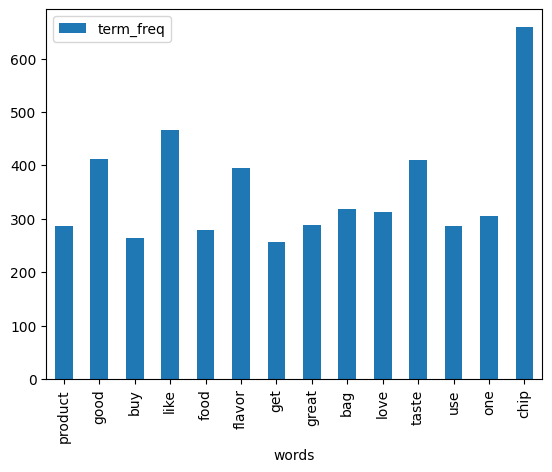

In [27]:
term_freq[term_freq["term_freq"] > 250].plot.bar(x="words", y="term_freq")
plt.show(block=True)

# Word Cloud

In [28]:
#!pip install wordcloud

In [29]:
from wordcloud import WordCloud

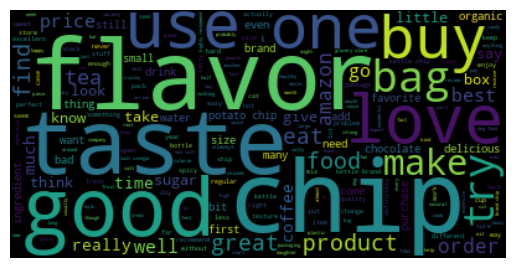

In [30]:
text = " ".join(i for i in data.Cleaned_Text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

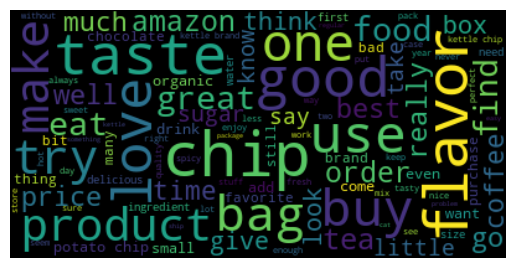

In [31]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# Sentiment Analysis - VADER

VADER (Valence Aware Dictionary Sentiment Reasoner), This is used for Sentiment Analysis because it is specifically designed to perform well with social media text, and informal text. It captures the positive sentiment as well as the emoticon.

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijayalekshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
data['Cleaned_Text'].head(10)

0    buy several can dog food product find good qua...
1    product arrive label jumbo salt peanut peanut ...
2    around light citrus nut case cut tiny square c...
3    look secret ingredient believe find get additi...
4    great taffy great price wide assortment yummy ...
5    get wild hair taffy order five pound bag taffy...
6    taffy great flavor soft chewy candy individual...
7    taffy good soft chewy flavor amaze would defin...
8               right mostly cat eat grass love around
9    healthy dog food good digestion also good smal...
Name: Cleaned_Text, dtype: object

The SentimentIntensityAnalyzer from NLTK's VADER module is a useful tool for performing sentiment analysis. We use the SentimentIntensityAnalyzer to get sentiment scores for individual sentences or larger pieces of text. The polarity_scores method returns a dictionary with the following keys: neg: Negative sentiment score (range from 0 to 1). neu: Neutral sentiment score (range from 0 to 1). pos: Positive sentiment score (range from 0 to 1). compound: A compound score that combines the three sentiment scores into a single value, ranging from -1 (most negative) to +1 (most positive).

In [34]:
from nltk.sentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [35]:
#applying vader in our dataset
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...
1    {'neg': 0.135, 'neu': 0.75, 'pos': 0.115, 'com...
2    {'neg': 0.162, 'neu': 0.479, 'pos': 0.358, 'co...
3    {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
4    {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...
5    {'neg': 0.044, 'neu': 0.659, 'pos': 0.297, 'co...
6    {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'comp...
7    {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'comp...
8    {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
9    {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...
Name: Cleaned_Text, dtype: object

In [36]:
data["Cleaned_Text"][0:10].apply(lambda x: sa.polarity_scores(x)["compound"])

0    0.9022
1   -0.1027
2    0.8624
3    0.4404
4    0.9468
5    0.9136
6    0.9422
7    0.9274
8    0.6369
9    0.8176
Name: Cleaned_Text, dtype: float64

In [37]:
data["polarity_score"] = data["Cleaned_Text"].apply(lambda x: sa.polarity_scores(x)["compound"])
data

,Score,Text,Char_count,Word_Count,Cleaned_Text,polarity_score
0,5,I have bought several of the Vitality canned d...,263,48,buy several can dog food product find good qua...,0.9022
1,1,Product arrived labeled as Jumbo Salted Peanut...,190,31,product arrive label jumbo salt peanut peanut ...,-0.1027
2,4,This is a confection that has been around a fe...,509,94,around light citrus nut case cut tiny square c...,0.8624
3,2,If you are looking for the secret ingredient i...,219,41,look secret ingredient believe find get additi...,0.4404
4,5,Great taffy at a great price. There was a wid...,140,27,great taffy great price wide assortment yummy ...,0.9468
...,...,...,...,...,...,...
994,5,absolutely love the habenaro sauce...use it on...,256,40,absolutely love sauce use egg sandwich anythin...,0.8122
995,5,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,477,94,black market hot sauce wonderful husband love ...,0.9856
996,5,"Man what can i say, this salsa is the bomb!! i...",305,62,man say salsa bomb different kind almost every...,0.5719
997,5,this sauce is so good with just about anything...,265,53,sauce good anything like add asian food anythi...,0.9375


In [38]:
data['Sentiment']=data["Cleaned_Text"].apply(lambda x: 'positive' if sa.polarity_scores(x)["compound"] > 0  else 'neutral' if sa.polarity_scores(x)["compound"] == 0  else 'negative')
data.head(30)

,Score,Text,Char_count,Word_Count,Cleaned_Text,polarity_score,Sentiment
0,5,I have bought several of the Vitality canned d...,263,48,buy several can dog food product find good qua...,0.9022,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,190,31,product arrive label jumbo salt peanut peanut ...,-0.1027,negative
2,4,This is a confection that has been around a fe...,509,94,around light citrus nut case cut tiny square c...,0.8624,positive
3,2,If you are looking for the secret ingredient i...,219,41,look secret ingredient believe find get additi...,0.4404,positive
4,5,Great taffy at a great price. There was a wid...,140,27,great taffy great price wide assortment yummy ...,0.9468,positive
5,4,I got a wild hair for taffy and ordered this f...,416,72,get wild hair taffy order five pound bag taffy...,0.9136,positive
6,5,This saltwater taffy had great flavors and was...,304,49,taffy great flavor soft chewy candy individual...,0.9422,positive
7,5,This taffy is so good. It is very soft and ch...,140,24,taffy good soft chewy flavor amaze would defin...,0.9274,positive
8,5,Right now I'm mostly just sprouting this so my...,131,26,right mostly cat eat grass love around,0.6369,positive
9,5,This is a very healthy dog food. Good for thei...,137,25,healthy dog food good digestion also good smal...,0.8176,positive


In [39]:
data['Cleaned_Text'][26]


'candy red flavor plan chewy would never buy'

In [40]:
data['Text'][26]

'The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again'

In [41]:
data["Sentiment"].value_counts()

Sentiment
positive    909
negative     70
neutral      20
Name: count, dtype: int64

The LabelEncoder from Scikit-learn to convert the sentiment scores into numerical labels. The LabelEncoder will find all unique values in the data["Sentiment"] column. It will assign a unique integer to each unique sentiment score. The sentiment scores (which were previously floating-point numbers from the VADER analysis) are replaced by these integer labels. 

LabelEncoder() initializes a new instance of the LabelEncoder class. ".fit_transform(data["Sentiment"])" performs two actions: 1.fit: Learns the unique values in data["Sentiment"]. 2.transform: Converts these unique values into numerical labels.

In [43]:
from sklearn.preprocessing import LabelEncoder
data["Sentiment"] = LabelEncoder().fit_transform(data["Sentiment"])
data.head(20)

,Score,Text,Char_count,Word_Count,Cleaned_Text,polarity_score,Sentiment
0,5,I have bought several of the Vitality canned d...,263,48,buy several can dog food product find good qua...,0.9022,2
1,1,Product arrived labeled as Jumbo Salted Peanut...,190,31,product arrive label jumbo salt peanut peanut ...,-0.1027,0
2,4,This is a confection that has been around a fe...,509,94,around light citrus nut case cut tiny square c...,0.8624,2
3,2,If you are looking for the secret ingredient i...,219,41,look secret ingredient believe find get additi...,0.4404,2
4,5,Great taffy at a great price. There was a wid...,140,27,great taffy great price wide assortment yummy ...,0.9468,2
5,4,I got a wild hair for taffy and ordered this f...,416,72,get wild hair taffy order five pound bag taffy...,0.9136,2
6,5,This saltwater taffy had great flavors and was...,304,49,taffy great flavor soft chewy candy individual...,0.9422,2
7,5,This taffy is so good. It is very soft and ch...,140,24,taffy good soft chewy flavor amaze would defin...,0.9274,2
8,5,Right now I'm mostly just sprouting this so my...,131,26,right mostly cat eat grass love around,0.6369,2
9,5,This is a very healthy dog food. Good for thei...,137,25,healthy dog food good digestion also good smal...,0.8176,2


In [44]:
data["Sentiment"].value_counts()

Sentiment
2    909
0     70
1     20
Name: count, dtype: int64

In [45]:
# Seperating Positive, Negative and Neutral Sentiment
positive_texts = ' '.join(data[data['Sentiment'] == 1]['Cleaned_Text'])
neutral_texts = ' '.join(data[data['Sentiment'] == 2]['Cleaned_Text'])
negative_texts = ' '.join(data[data['Sentiment'] == 0]['Cleaned_Text'])

In [46]:
print(f'Positive texts length: {len(positive_texts)}')
print(f'Neutral texts length: {len(neutral_texts)}')
print(f'Negative texts length: {len(negative_texts)}')

Positive texts length: 1450
Neutral texts length: 196390
Negative texts length: 11595


In [47]:
# Generating word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_texts)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_texts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)


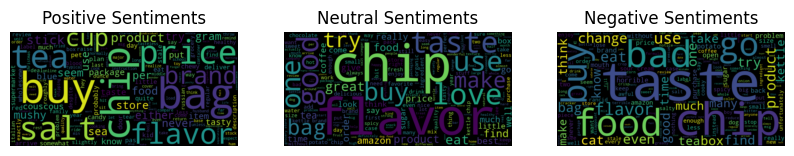

In [48]:
# Display the word clouds
plt.figure(figsize=(10, 10))

# Positive word cloud
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

# Neutral word cloud
plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

# Negative word cloud
plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

plt.show()

In [49]:
X = data["Cleaned_Text"] # independent variable

In [50]:
Y= data["Sentiment"] #dependent Variable

# Count Vectorizer

CountVectorizer from Scikit-learn is used to convert a collection of text documents into a matrix of token counts. This is a common preprocessing step in natural language processing (NLP) and text mining tasks. It creates a bag-of-words representation, where each text document is represented by the frequency (or count) of each word that appears in the document. This model does not consider word order but focuses on the presence or absence of words. Each unique word in the corpus becomes a feature (a column in the matrix), and each document is represented as a vector where the value of each feature is the count of that word in the document.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_cv = vectorizer.fit_transform(X)

In [52]:
vectorizer.get_feature_names_out()[1:50]

array(['absence', 'absolute', 'absolutely', 'absorb', 'acai',
       'acceptable', 'access', 'accident', 'accord', 'account', 'acerola',
       'acid', 'acquire', 'across', 'act', 'active', 'activity', 'actual',
       'actually', 'ad', 'add', 'added', 'addict', 'addicted',
       'addiction', 'addictive', 'addition', 'additionally', 'additive',
       'address', 'admit', 'adore', 'adult', 'advantage', 'advertise',
       'advertised', 'advertising', 'affect', 'affordable', 'afternoon',
       'aftertaste', 'afterwards', 'agave', 'age', 'ago', 'agree',
       'ahead', 'ahmad', 'aholic'], dtype=object)

In [53]:
X_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

N-Gram Frequency

In [55]:
vectorizer_2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_ngram = vectorizer_2.fit_transform(X)
vectorizer_2.get_feature_names_out()[1:50]

array(['able buy', 'able eat', 'able find', 'able fully', 'able get',
       'able keep', 'able make', 'able munch', 'able rip', 'able save',
       'able substitute', 'able tell', 'able test', 'able three',
       'able warm', 'absence corn', 'absence especially', 'absolute best',
       'absolute favorite', 'absolutely amaze', 'absolutely artificial',
       'absolutely delicious', 'absolutely excellent',
       'absolutely flavoring', 'absolutely forget', 'absolutely hate',
       'absolutely husband', 'absolutely interest', 'absolutely love',
       'absolutely nothing', 'absolutely recommend', 'absorb flavor',
       'absorb liquid', 'absorb water', 'acai berry', 'acai experience',
       'acai flavor', 'acai high', 'acai ingredient', 'acai juice',
       'acai organic', 'acceptable buy', 'acceptable consistency',
       'access coffee', 'access hot', 'accident amazon', 'accident find',
       'accord bag', 'accord guinness'], dtype=object)

In [56]:
X_ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# TF-IDF

TF-IDF is similar to "CountVectorizer()" but instead of just counting the occurence of words in each document, it calculates the term frequency- inverse document frequency (TF-IDF) value of each value.

* Term Frequency (TF):- It measures how frequently a term(word) appears in a document
TF = (Number of times term t appears in a document) / (Total number of terms in the document)

* Inverse Document Frequency (IDF):- Measures how important a term is across the entire corpus.
IDF = log_e(Total number of documents / Number of documents with term t in it)

* TF-IDF:- It is the product of TF and IDF, giving a higher weight to terms that are rare in the entire corpus but frequent in specific documents.
TF-IDF = TF * IDF



In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()

# Fit and transform the document
X_tf_idf = tf_idf_vectorizer.fit_transform(X)

In [73]:
print("TF-IDF Feature Names:")
tf_idf_vectorizer.get_feature_names_out()[1:50]

TF-IDF Feature Names:


array(['absence', 'absolute', 'absolutely', 'absorb', 'acai',
       'acceptable', 'access', 'accident', 'accord', 'account', 'acerola',
       'acid', 'acquire', 'across', 'act', 'active', 'activity', 'actual',
       'actually', 'ad', 'add', 'added', 'addict', 'addicted',
       'addiction', 'addictive', 'addition', 'additionally', 'additive',
       'address', 'admit', 'adore', 'adult', 'advantage', 'advertise',
       'advertised', 'advertising', 'affect', 'affordable', 'afternoon',
       'aftertaste', 'afterwards', 'agave', 'age', 'ago', 'agree',
       'ahead', 'ahmad', 'aholic'], dtype=object)

In [59]:
X_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
# Print the TF-IDF matrix for debugging
print("TF-IDF Matrix Shape:")
print(X_tf_idf.shape)

TF-IDF Matrix Shape:
(999, 2487)


In [75]:
from sklearn.cluster import KMeans

# Cluster the text data
num_clusters = 3  # Adjust this number according to your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tf_idf)
data['Cluster'] = kmeans.labels_

# Print the cluster assignments for debugging
print("Cluster Assignments:")
print(data['Cluster'])


Cluster Assignments:
0      1
1      2
2      2
3      1
4      2
      ..
994    1
995    1
996    1
997    1
998    2
Name: Cluster, Length: 999, dtype: int32


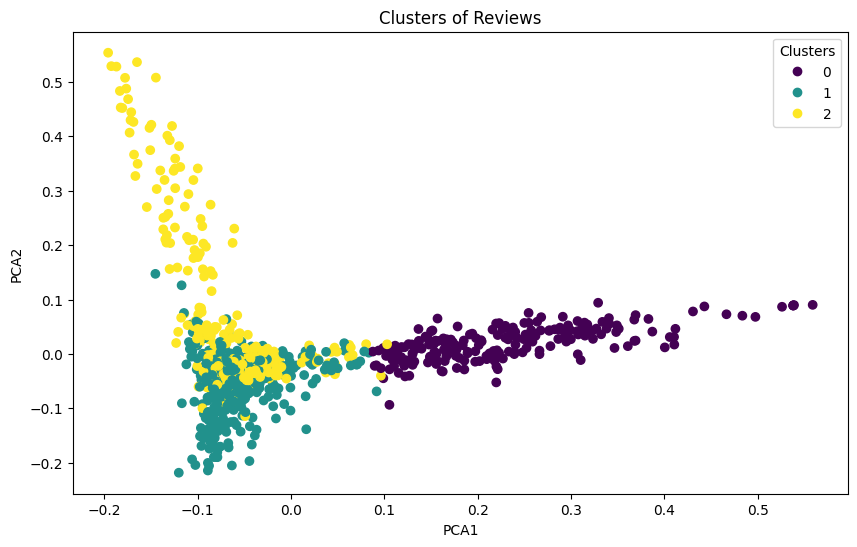

In [78]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_tf_idf.toarray())

# Create a DataFrame for visualization
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Clusters of Reviews')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

N-Gram Frequency

In [80]:
tf_idf_vectorizer_2 = TfidfVectorizer(ngram_range=(2,2), max_df=0.85, min_df=2, stop_words='english')
X_tf_idf_ngram = tf_idf_vectorizer_2.fit_transform(X)
tf_idf_vectorizer_2.get_feature_names_out()[1:50]

array(['absolute favorite', 'absolutely delicious', 'absolutely love',
       'acai juice', 'acid subdue', 'actually know', 'actually like',
       'actually make', 'actually order', 'actually pretty',
       'actually taste', 'add bit', 'add great', 'add little',
       'add oatmeal', 'add spice', 'add veggie', 'add water',
       'add wonderful', 'added bonus', 'addict buy', 'addict good',
       'addict salty', 'admit chip', 'afternoon drink', 'afternoon snack',
       'aftertaste like', 'agave nectar', 'age oak', 'age vet',
       'agree previous', 'agree review', 'ahmad tea', 'air help',
       'air tight', 'alternate bite', 'amazing crunch', 'amazon able',
       'amazon buy', 'amazon carry', 'amazon cheap', 'amazon com',
       'amazon come', 'amazon day', 'amazon free', 'amazon good',
       'amazon great', 'amazon grocery', 'amazon hard'], dtype=object)

In [81]:
X_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Cluster Assignments:
0      0
1      0
2      0
3      0
4      0
      ..
994    0
995    0
996    0
997    0
998    0
Name: Cluster_ngram, Length: 999, dtype: int32


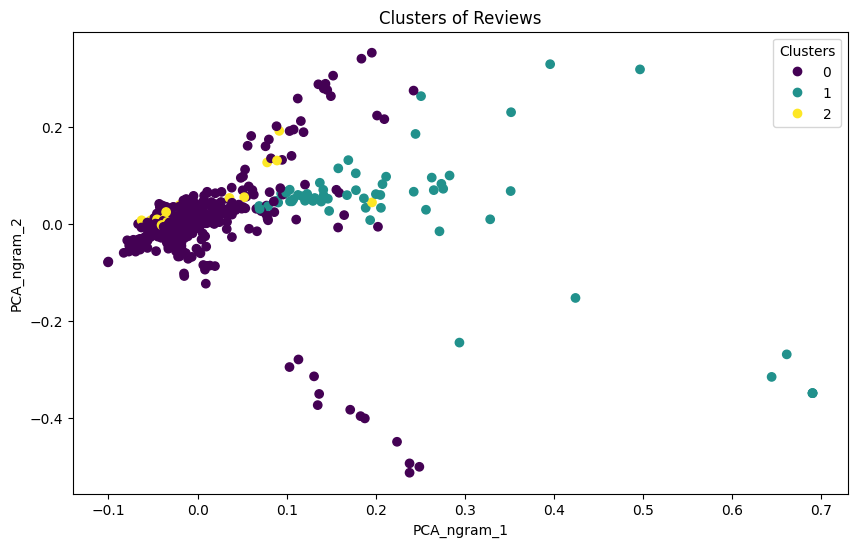

In [83]:
# Cluster the text data
num_clusters = 3  # Adjust this number according to your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tf_idf_ngram)
data['Cluster_ngram'] = kmeans.labels_

# Print the cluster assignments for debugging
print("Cluster Assignments:")
print(data['Cluster_ngram'])

# Use PCA to reduce dimensions for visualization
pca_ngram = PCA(n_components=2, random_state=42)
pca_ngram_result = pca_ngram.fit_transform(X_tf_idf_ngram.toarray())

# Create a DataFrame for visualization
data['PCA_ngram_1'] = pca_ngram_result[:, 0]
data['PCA_ngram_2'] = pca_ngram_result[:, 1]

# Plot the clusters using matplotlib.pyplot.scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PCA_ngram_1'], data['PCA_ngram_2'], c=data['Cluster_ngram'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Clusters of Reviews')
plt.xlabel('PCA_ngram_1')
plt.ylabel('PCA_ngram_2')
plt.show()

# Sentiment Analysis Modeling

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, Y, test_size=0.2, random_state=42)


# Convert X_train to a sparse matrix (CSR format for example)
# Sparse matrices cannot be used directly with the StandardScaler unless you specifically set with_mean=False. 
# When working with high-dimensional data, such as text data that has been transformed using methods like TF-IDF,sparse matrices are usually employed.
X_train_sparse = csr_matrix(X_train)

#Perform cross-validation on the training set for hyperparameter tuning
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_sparse)

# Support Vector Regression - SVR

In [85]:
from sklearn.svm import SVR

In [86]:
# Count Vectors
svr_model = SVR(kernel='rbf', C=10).fit(X_cv, Y)
cross_val_score(svr_model, X_cv, Y, cv=5, n_jobs=-1).mean()

-0.03216538385203591

In [87]:
# TF-IDF Word-Level
svr_tf_model = SVR(kernel='rbf', C=10).fit(X_tf_idf, Y)
cross_val_score(svr_tf_model, X_tf_idf, Y, cv=5, n_jobs=-1).mean()

0.019215674984961417

In [88]:
# TF-IDF N-GRAM
svr_ng_model = SVR(kernel='rbf', C=10).fit(X_tf_idf_ngram, Y)
cross_val_score(svr_ng_model, X_tf_idf_ngram, Y, cv=5, n_jobs=-1).mean()

-0.054504478181514694

Hyperparameter Optimization - SVR

In [89]:
# Define the model and parameter grid for tuning
svr = SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1]
}

# Perform GridSearchCV with cross-validation
grid_search_svr = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search_svr.fit(X_train_scaled, y_train)

#Train the final model on the entire training set with the best hyperparameters
best_svr = grid_search_svr.best_estimator_
best_svr.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_svr = scaler.transform(X_test)
y_pred_svr = best_svr.predict(X_test_scaled_svr)


# Calculate performance metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error on Test Set: {mse_svr:.2f}')

# Using R^2 as the scoring metric
r2_scores_svr = cross_val_score(svr_model, X_tf_idf, Y, scoring='r2', cv=5).mean()
print(f'Mean R^2: {r2_scores_svr:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {grid_search_svr.best_params_}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mean Squared Error on Test Set: 0.26
Mean R^2: 0.02
Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}


In [90]:
# Count Vectors
svr_model_best = SVR(kernel='rbf', C=10, epsilon=0.01).fit(X_cv, Y)
print("Best Model:",cross_val_score(svr_model_best, X_cv, Y, cv=5, n_jobs=-1).mean())

Best Model: -0.026505477268915546


# Support Vector Classifier - SVC

In [91]:
from sklearn.svm import SVC

In [92]:
# Count Vectors
svc_model = SVC(kernel='linear', C=10).fit(X_cv, Y)
cross_val_score(svc_model, X_cv, Y, cv=5, n_jobs=-1).mean()

0.8908994974874371

In [93]:
# TF-IDF Word-Level
svc_tf_model = SVC(kernel='poly', C=10).fit(X_tf_idf, Y)
cross_val_score(svc_tf_model, X_tf_idf, Y, cv=5, n_jobs=-1).mean()

0.9099095477386936

In [94]:
# TF-IDF N-GRAM
svc_ng_model = SVC(kernel='rbf', C=10).fit(X_tf_idf_ngram, Y)
cross_val_score(svc_ng_model, X_tf_idf_ngram, Y, cv=5, n_jobs=-1).mean()

0.9109145728643216

Hyper Parameter Optimization - SVC

In [96]:
# Define the model and parameter grid for tuning
svc = SVC()
svc_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']}


# Perform GridSearchCV with cross-validation
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1).fit(X_cv, Y)

#Train the final model on the entire training set with the best hyperparameters
best_svc = svc_grid.best_estimator_
best_svc.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_svc = scaler.transform(X_test)
y_pred_svc = best_svc.predict(X_test_scaled_svc)

#Calculate the accuracy
acc_svc=accuracy_score(y_test,y_pred_svc)
print(f'Accuracy: {acc_svc:.2f}')

# Calculate performance metrics
mse_svc = mean_squared_error(y_test, y_pred_svc)
print(f'Mean Squared Error on Test Set: {mse_svc:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {svc_grid.best_params_}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Accuracy: 0.91
Mean Squared Error on Test Set: 0.28
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [95]:
# Count Vectors
svc_model_best = SVC(kernel='rbf', C=10, gamma='scale').fit(X_cv, Y)
print("Best Model:",cross_val_score(svc_model_best, X_cv, Y, cv=5, n_jobs=-1).mean())

Best Model: 0.9119095477386935


In [97]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         5
           2       0.91      1.00      0.95       182

    accuracy                           0.91       200
   macro avg       0.30      0.33      0.32       200
weighted avg       0.83      0.91      0.87       200



# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_cv, Y)
cross_val_score(rf_model, X_cv, Y, cv=5, n_jobs=-1).mean()

0.9099095477386936

In [101]:
# TF-IDF Word-Level
rf_tf_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_tf_idf, Y)
cross_val_score(rf_tf_model, X_tf_idf, Y, cv=5, n_jobs=-1).mean()

0.9099095477386936

In [102]:
# TF-IDF N-GRAM
rf_ng_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_tf_idf_ngram, Y)
cross_val_score(rf_ng_model, X_tf_idf_ngram, Y, cv=5, n_jobs=-1).mean()

0.9069095477386935

Hyper Parameter Optimization - Random Forest

In [103]:
# Define the model and parameter grid for tuning
rf_tf_model = RandomForestClassifier()
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200,300]}

# Perform GridSearchCV with cross-validation
rf_grid = GridSearchCV(rf_tf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_cv, Y)

#Train the final model on the entire training set with the best hyperparameters
best_rf = rf_grid.best_estimator_
best_rf.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_rf = scaler.transform(X_test)
y_pred_rf = best_rf.predict(X_test_scaled_rf)

#Calculate the accuracy
acc_rf=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy: {acc_rf:.2f}')

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error on Test Set: {mse_rf:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {rf_grid.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Accuracy: 0.91
Mean Squared Error on Test Set: 0.28
Best Parameters: {'max_depth': 8, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 100}


In [104]:
# TF-IDF Word-Level - With best parameters
rf_tf_model_best = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_tf_idf, Y)
print("Best Model: ",cross_val_score(rf_tf_model_best, X_tf_idf, Y, cv=5, n_jobs=-1).mean())

Best Model:  0.9099095477386936


In [105]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         5
           2       0.91      1.00      0.95       182

    accuracy                           0.91       200
   macro avg       0.30      0.33      0.32       200
weighted avg       0.83      0.91      0.87       200



# Naive Bayes

In [106]:
from sklearn.naive_bayes import MultinomialNB

In [107]:
# Count Vectors
nb_model = MultinomialNB(alpha=1.0, fit_prior=True,class_prior=None).fit(X_cv, Y)
cross_val_score(nb_model, X_cv, Y, cv=5, n_jobs=-1).mean() 

0.8548793969849247

In [108]:
# TF-IDF Word-Level
nb_tf_model = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None).fit(X_tf_idf, Y)
cross_val_score(nb_tf_model, X_tf_idf, Y, cv=5, n_jobs=-1).mean()

0.9099095477386936

In [109]:
# TF-IDF N-GRAM
nb_ng_model = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None).fit(X_tf_idf_ngram, Y)
cross_val_score(nb_ng_model, X_tf_idf_ngram, Y, cv=5, n_jobs=-1).mean()

0.9029095477386935

Hyper Parameter Optimization - Naive Bayes

In [110]:
# Define the model and parameter grid for tuning
nb_model = MultinomialNB()

nb_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]}


# Perform GridSearchCV with cross-validation
nb_grid = GridSearchCV(nb_model, param_grid=nb_params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1).fit(X_cv, Y)

#Train the final model on the entire training set with the best hyperparameters
best_nb = nb_grid.best_estimator_
best_nb.fit(X_train_scaled, y_train)

#Evaluate the final model on the test set
X_test_scaled_nb = scaler.transform(X_test)
y_pred_nb = best_nb.predict(X_test_scaled_nb)

#Calculate the accuracy
acc_nb=accuracy_score(y_test,y_pred_nb)
print(f'Accuracy: {acc_nb:.2f}')

# Calculate performance metrics
mse_nb = mean_squared_error(y_test, y_pred_nb)
print(f'Mean Squared Error on Test Set: {mse_nb:.2f}')

# Print the best parameters found during cross-validation
print(f'Best Parameters: {nb_grid.best_params_}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Accuracy: 0.78
Mean Squared Error on Test Set: 0.51
Best Parameters: {'alpha': 2.0, 'fit_prior': True}


In [111]:
# TF-IDF Word-Level
nb_tf_model_best = MultinomialNB(alpha=2.0,fit_prior=True,class_prior=None).fit(X_tf_idf, Y)
print("Best Model:",cross_val_score(nb_tf_model_best, X_tf_idf, Y, cv=5, n_jobs=-1).mean())

Best Model: 0.9099095477386936


In [112]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        13
           1       0.04      0.20      0.07         5
           2       0.93      0.84      0.88       182

    accuracy                           0.78       200
   macro avg       0.37      0.40      0.37       200
weighted avg       0.85      0.78      0.81       200



In [114]:

from sklearn.pipeline import make_pipeline
import joblib 

# Encode the sentiment labels
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])


# Create a pipeline to streamline the process
pipeline = make_pipeline(tf_idf_vectorizer, svc_model_best)

# Train the model on the entire dataset
pipeline.fit(X, Y)

# Save the trained model and label encoder to disk
joblib.dump(pipeline, 'Models/sentiment_svc_model.pkl')
joblib.dump(label_encoder, 'Models/label_encoder.pkl')

print("Model and label encoder trained and saved successfully.")



Model and label encoder trained and saved successfully.


In [115]:
# Later on, load the model and predict new data
def predict_sentiment(new_texts):
    # Load the saved model
    model = joblib.load('Models/sentiment_svc_model.pkl')
    
    # Predict the sentiments
    predictions = model.predict(new_texts)
    
    # Decode the predictions if necessary
    sentiment_labels = label_encoder.inverse_transform(predictions)
    
    return sentiment_labels

In [118]:
# Example usage
new_data = ['I feel great about this product!']
new_data2 = ["I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."]
new_data3 = ["The sky is clear."]
predicted_sentiments = predict_sentiment(new_data2)
print(predicted_sentiments)

[0]


In [93]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

In [100]:
X_combined_std = np.vstack((X_train_scaled, X_test_scaled_svc))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

ValueError: inconsistent shapes

In [99]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_scaled, y_train)

Perceptron(eta0=0.1, random_state=1)

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Convert to DataFrame to mimic a more complex dataset
# For demonstration, let's assume the first two features are numerical and the next two are categorical
X_df = pd.DataFrame(X, columns=['num1', 'num2', 'cat1', 'cat2'])
X_df['cat1'] = X_df['cat1'].apply(lambda x: 'cat' + str(int(x)))
X_df['cat2'] = X_df['cat2'].apply(lambda x: 'cat' + str(int(x)))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.3, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_features = ['num1', 'num2']
categorical_features = ['cat1', 'cat2']

# Create transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first preprocesses the data then applies the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=42))
])

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Define plot_decision_regions function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

# Note: For decision region plotting, we need to fit the model with only two features (for visualization)
# Here, we'll use only the first two numerical features for the sake of example
X_plot = X_df[['num1', 'num2']].values
y_plot = Y

# Split the plotting data
X_plot_train, X_plot_test, y_plot_train, y_plot_test = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

# Standardize only the plotting data
scaler_plot = StandardScaler()
X_plot_train_scaled = scaler_plot.fit_transform(X_plot_train)
X_plot_test_scaled = scaler_plot.transform(X_plot_test)

# Combine the train and test data for plotting
X_plot_combined = np.vstack((X_plot_train_scaled, X_plot_test_scaled))
y_plot_combined = np.hstack((y_plot_train, y_plot_test))

# Train a simple SVM on the plotting data
svc_plot = SVC(kernel='linear', C=1.0, random_state=42)
svc_plot.fit(X_plot_train_scaled, y_plot_train)

# Plot decision regions
plot_decision_regions(X=X_plot_combined, y=y_plot_combined, classifier=svc_plot, test_idx=range(105, 150))
plt.xlabel('Numerical Feature 1 [standardized]')
plt.ylabel('Numerical Feature 2 [standardized]')
plt.legend(loc='upper left')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [0, 999]